# Tuning hyper-parameters for precision

Best parameters set found on development set:

{'max_depth': 3, 'max_features': 4, 'min_samples_split': 2}

Grid scores on development set:

0.673 (+/-0.135) for {'max_depth': 3, 'max_features': 2, 'min_samples_split': 2}
0.727 (+/-0.073) for {'max_depth': 3, 'max_features': 2, 'min_samples_split': 3}
0.681 (+/-0.086) for {'max_depth': 3, 'max_features': 2, 'min_samples_split': 4}
0.735 (+/-0.133) for {'max_depth': 3, 'max_features': 2, 'min_samples_split': 5}
0.756 (+/-0.052) for {'max_depth': 3, 'max_features': 4, 'min_samples_split': 2}
0.715 (+/-0.177) for {'max_depth': 3, 'max_features': 4, 'min_samples_split': 3}
0.717 (+/-0.101) for {'max_depth': 3, 'max_features': 4, 'min_samples_split': 4}
0.705 (+/-0.096) for {'max_depth': 3, 'max_features': 4, 'min_samples_split': 5}
0.731 (+/-0.025) for {'max_depth': 3, 'max_features': 6, 'min_samples_split': 2}
0.736 (+/-0.090) for {'max_depth': 3, 'max_features': 6, 'min_samples_split': 3}
0.739 (+

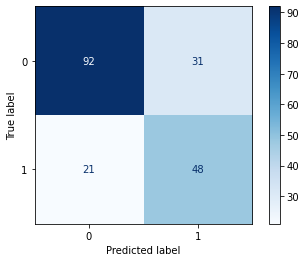

              precision    recall  f1-score   support

           0       0.81      0.75      0.78       123
           1       0.61      0.70      0.65        69

    accuracy                           0.73       192
   macro avg       0.71      0.72      0.71       192
weighted avg       0.74      0.73      0.73       192



TP - True Negative 92
FP - False Positive 31
FN - False Negative 21
TP - True Positive 48
Accuracy Rate: 0.7291666666666666
Misclassification Rate: 0.2708333333333333


0.72181

In [2]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, roc_auc_score, roc_curve
from sklearn.metrics import classification_report, confusion_matrix, plot_confusion_matrix

# Importing the dataset
dataset = pd.read_csv('diabetes.csv')
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, 8].values

# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 42)

# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

#dt with grid search
dt = DecisionTreeClassifier(random_state = 0)
parameters = {'max_depth':[3,6,9], 'max_features':[2,4,6,8],'min_samples_split':[2,3,4,5]}

scores = ['precision', 'recall']

for score in scores:
    print("# Tuning hyper-parameters for %s" % score)
    print()

    dt = GridSearchCV(DecisionTreeClassifier(), parameters, cv=5,
                       scoring='%s_macro' % score)
    dt.fit(X_train, y_train)

    print("Best parameters set found on development set:")
    print()
    print(dt.best_params_)
    print()
    print("Grid scores on development set:")
    print()
    means = dt.cv_results_['mean_test_score']
    stds = dt.cv_results_['std_test_score']
    for mean, std, params in zip(means, stds, dt.cv_results_['params']):
        print("%0.3f (+/-%0.03f) for %r"
              % (mean, std * 2, params))
    print()

    print("Detailed classification report:")
    print()
    print("The model is trained on the full development set.")
    print("The scores are computed on the full evaluation set.")
    print()
    y_true, y_pred = y_test, dt.predict(X_test)
    print(classification_report(y_true, y_pred))
    print()



# Adjusting development threshold
tree = DecisionTreeClassifier(max_depth = 6, max_features = 4, 
                              min_samples_split = 5, 
                              random_state=42)
X_train,X_test,y_train,y_test = train_test_split(X, y, random_state=42)
tree.fit(X_train, y_train)
print(tree.get_params(deep=False))
print()
print()
print("Accuracy on training set: {:.3f}".format(tree.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(tree.score(X_test, y_test)))
print()
print()

# Predicting the Test set results
y_pred = tree.predict(X_test) 

# Making the Confusion Matrix
disp = plot_confusion_matrix(tree, X_test, y_test, cmap=plt.cm.Blues)
plt.show()
cm = confusion_matrix(y_test, y_pred)

cr = classification_report(y_test, y_pred)
print(cr)
print()
print()

print('TP - True Negative {}'.format(cm[0,0]))
print('FP - False Positive {}'.format(cm[0,1]))
print('FN - False Negative {}'.format(cm[1,0]))
print('TP - True Positive {}'.format(cm[1,1]))
print('Accuracy Rate: {}'.format(np.divide(np.sum([cm[0,0],cm[1,1]]),np.sum(cm))))
print('Misclassification Rate: {}'.format(np.divide(np.sum([cm[0,1],cm[1,0]]),np.sum(cm))))

round(roc_auc_score(y_test,y_pred),5)
